```
Topic:        Challenge Set 8
Subject:      Classification Error Metric Challenges
Date:         10/16/2017
Name:         Jeff Kao
Worked with:  Jeff Kao... :-(
```

# Week 4 Challenge: Classification Error Metric Challenges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [2]:
house_votes_df = pd.read_csv("house-votes-84.data", header=None)

In [3]:
def char_to_vote(char):
    if char == 'y':
        return 1
    elif char == 'n':
        return 0
    else:
        return None

In [4]:
house_votes_df.iloc[:,1:] = house_votes_df.iloc[:,1:].applymap(char_to_vote)

In [5]:
# convert each ? to mean of column
for column in house_votes_df.iloc[:,1:]:
    col_mean = house_votes_df[column].mean()
    house_votes_df[column] = house_votes_df[column].fillna(col_mean)

In [6]:
# finally separate X and y
y = house_votes_df.iloc[:,0]
X = house_votes_df.iloc[:,1:]
# train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score, auc

In [8]:
knn_classifiers = {}
knn_classifiers_accuracies = {}

In [9]:
for nns in range(1,21):
    knn_classifiers[nns] = KNeighborsClassifier(n_neighbors=nns)
    knn_classifiers[nns].fit(X_train, y_train)
    y_test_pred = knn_classifiers[nns].predict(X_test)
    knn_classifiers_accuracies[nns] = accuracy_score(y_test, y_test_pred)

In [10]:
max_key = max(knn_classifiers_accuracies, key=knn_classifiers_accuracies.get)
max_value = knn_classifiers_accuracies[max_key]
max_key, max_value

(6, 0.93129770992366412)

In [11]:
# now calculate accuracy, precision, recall and f1 scores on the test set
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, knn_classifiers[max_key].predict(X_test))
print(precision, recall, fbeta_score)

[ 0.925       0.94117647] [ 0.96103896  0.88888889] [ 0.94267516  0.91428571]


0.948412698413


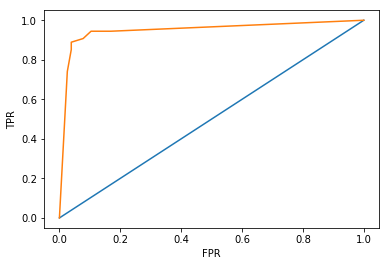

In [12]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, knn_classifiers[max_key].predict_proba(X_test)[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_classifiers = {}
lr_classifiers_accuracies = {}

In [15]:
for c_penalty in np.logspace(-8,8,num=17):
    lr_classifiers[c_penalty] = LogisticRegression(C=c_penalty , random_state=4444)
    lr_classifiers[c_penalty].fit(X_train, y_train)
    y_test_pred = lr_classifiers[c_penalty].predict(X_test)
    lr_classifiers_accuracies[c_penalty] = accuracy_score(y_test, y_test_pred)

In [16]:
max_key = max(lr_classifiers_accuracies, key=lr_classifiers_accuracies.get)
max_value = lr_classifiers_accuracies[max_key]
max_key, max_value

(1.0, 0.93893129770992367)

In [17]:
# now calculate accuracy, precision, recall and f1 scores on the test set
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, lr_classifiers[max_key].predict(X_test))
print(precision, recall, fbeta_score)

[ 0.92592593  0.96      ] [ 0.97402597  0.88888889] [ 0.94936709  0.92307692]


0.987734487734


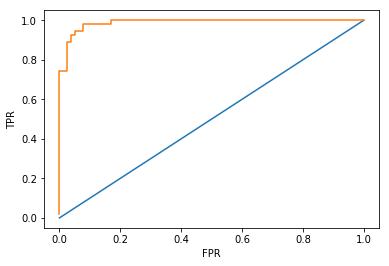

In [18]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, lr_classifiers[max_key].predict_proba(X_test)[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [19]:
def predict_one_party(X, predicted_party):
    return np.array([predicted_party]*len(X)) #.reshape(-1,1)

In [20]:
# predict all democrats
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, predict_one_party(X_test, 'democrat'))
print(precision, recall, fbeta_score)

[ 0.58778626  0.        ] [ 1.  0.] [ 0.74038462  0.        ]


/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
# predict all republicans
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, predict_one_party(X_test, 'republican'))
print(precision, recall, fbeta_score)

[ 0.          0.41221374] [ 0.  1.] [ 0.          0.58378378]


/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
# predict all whigs
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, predict_one_party(X_test, 'whig'))
print(precision, recall, fbeta_score)

[ 0.  0.  0.] [ 0.  0.  0.] [ 0.  0.  0.]


/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gnb_classifier = None
gnb_classifier_accuracy = None

In [25]:
gnb_classifier = GaussianNB(priors=None)
gnb_classifier.fit(X_train, y_train)
y_test_pred = gnb_classifier.predict(X_test)
gnb_classifier_accuracy = accuracy_score(y_test, y_test_pred)
gnb_classifier_accuracy

0.93893129770992367

0.984126984127


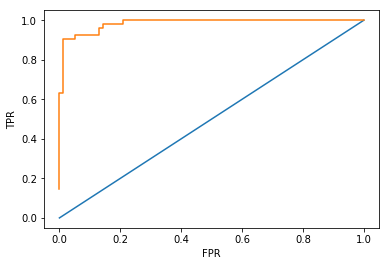

In [26]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, gnb_classifier.predict_proba(X_test)[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [27]:
from sklearn.svm import SVC

In [28]:
svm_classifiers = {}
svm_classifiers_accuracies = {}

In [29]:
for c_penalty in np.logspace(-8,8,num=17):
    svm_classifiers[c_penalty] = SVC(C=c_penalty, random_state=4444, probability=True)
    svm_classifiers[c_penalty].fit(X_train, y_train)
    y_test_pred = svm_classifiers[c_penalty].predict(X_test)
    svm_classifiers_accuracies[c_penalty] = accuracy_score(y_test, y_test_pred)

In [30]:
max_key = max(svm_classifiers_accuracies, key=svm_classifiers_accuracies.get)
max_value = svm_classifiers_accuracies[max_key]
max_key, max_value

(1.0, 0.95419847328244278)

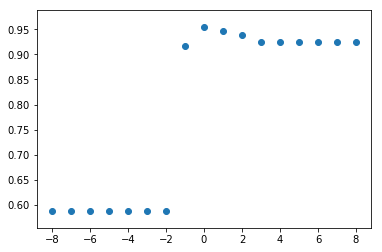

In [31]:
plt.scatter(np.log10(list(svm_classifiers_accuracies.keys())), list(svm_classifiers_accuracies.values()));

0.994949494949


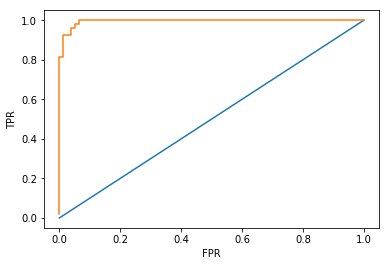

In [32]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_classifiers[max_key].predict_proba(X_test)[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_classifier = None
dt_classifier_accuracy = None

In [35]:
dt_classifier = DecisionTreeClassifier(random_state=4444)
dt_classifier.fit(X_train, y_train)
y_test_pred = dt_classifier.predict(X_test)
dt_classifier_accuracy = accuracy_score(y_test, y_test_pred)
dt_classifier_accuracy

0.93893129770992367

0.934223184223


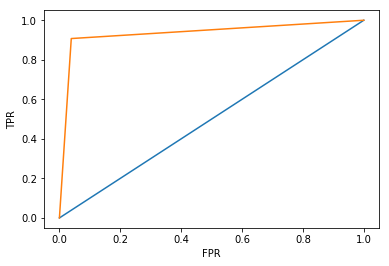

In [36]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_classifier = None
rf_classifier_accuracy = None

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=4444)
rf_classifier.fit(X_train, y_train)
y_test_pred = rf_classifier.predict(X_test)
rf_classifier_accuracy = accuracy_score(y_test, y_test_pred)
rf_classifier_accuracy

0.95419847328244278

0.99543049543


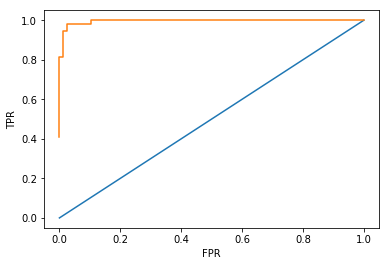

In [40]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [41]:
from sklearn.cross_validation import cross_val_score
from collections import defaultdict

In [42]:
# since cross_val_score can't take a pos_score, we convert democrat and republican to 0 and 1
y_nums = y.map({'democrat':0,'republican':1})

In [43]:
estimators = [LogisticRegression(C=1.0 , random_state=4444),
              KNeighborsClassifier(n_neighbors=6),
              GaussianNB(priors=None),
              SVC(C=1.0, random_state=4444),
              DecisionTreeClassifier(random_state=4444),
              RandomForestClassifier(n_estimators=200, random_state=4444)]
scores_for_estimators = defaultdict(list)
for estimator in estimators:
    for score_type in ['accuracy','precision','recall','f1']:
        scores = cross_val_score(
            estimator, 
            X, 
            y_nums, 
            scoring=score_type,
            cv=5)
        score = np.mean(scores)
        scores_for_estimators[score_type].append(score)
scores_for_estimators

defaultdict(list,
            {'accuracy': [0.9584839979587374,
              0.9333260431095235,
              0.94014422492770533,
              0.95396527423391897,
              0.93543960049573516,
              0.96080957935408617],
             'f1': [0.94727347673639239,
              0.91512365327802725,
              0.92470333312089736,
              0.9425472674272154,
              0.91663091178016542,
              0.95026121185757795],
             'precision': [0.94419603713721367,
              0.90445982859645091,
              0.9180567964349049,
              0.92387497306614963,
              0.91428152492668624,
              0.93812268437268431],
             'recall': [0.95240641711229945,
              0.92852049910873435,
              0.93458110516934045,
              0.96452762923351154,
              0.92192513368983953,
              0.96417112299465246]})

### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [44]:
movies_df = pd.read_csv('2013_movies.csv', header=0)

In [45]:
X_movies = movies_df[['Budget','DomesticTotalGross','Runtime']]
y_movies = movies_df['Rating']

In [46]:
# convert each NaN to mean of column
for column in X_movies.columns:
    col_mean = X_movies[column].mean()
    X_movies[column] = X_movies[column].fillna(col_mean)

/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
# one against rest -- we are not doing G because there is only 1 G movie.
ratings_list = ['PG','PG-13','R']
y_movies_dict = {}
for rating in ratings_list:
    y_movies_dict[rating] = y_movies.map(lambda x: 1 if x == rating else 0)

In [48]:
# take the best versions of the movie classifiers
estimators = [KNeighborsClassifier(n_neighbors=1),
              LogisticRegression(C=0.1 , random_state=4444)]

for rating in ratings_list:
    print(rating)
    scores_for_estimators = defaultdict(list)
    for estimator in estimators:
        for score_type in ['precision','recall']:
            scores = cross_val_score(
                estimator, 
                X_movies, 
                y_movies_dict[rating], 
                scoring=score_type,
                cv=5)
            score = np.mean(scores)
            scores_for_estimators[score_type].append(score)
    print(scores_for_estimators)

PG


/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Pr

defaultdict(<class 'list'>, {'recall': [0.26666666666666666, 0.0], 'precision': [0.06507936507936507, 0.0]})
PG-13
defaultdict(<class 'list'>, {'recall': [0.47555555555555562, 0.60444444444444445], 'precision': [0.46523809523809517, 0.46083333333333332]})
R
defaultdict(<class 'list'>, {'recall': [0.25714285714285712, 0.053571428571428568], 'precision': [0.16666666666666666, 0.40000000000000002]})


/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [49]:
haberman_df = pd.read_csv("haberman.data", header=None)
haberman_df.rename(columns={0:'age_operation',1:'year_operation',2:'num_nodes',3:'survival'}, inplace=True)

In [50]:
X = haberman_df.drop('survival', axis=1)
y = haberman_df['survival']

In [51]:
y = y.map({1:0,2:1})

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [53]:
# top models from our previous challenge set
estimator = LogisticRegression(C=100.0, random_state=4444)
estimator.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=4444, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.64527027027


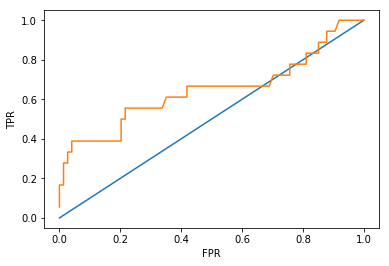

In [54]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, estimator.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)